In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pydot

In [3]:
data_pathname = "/Users/danielbrand/Documents/Uni/Master/1. Semester/Big Data Management/Final Project/final_full_station70_cyclic_<5_yesno.csv"

In [4]:
data = pd.read_csv(data_pathname)

In [122]:
data.describe()

,station_id,bikes_available,docks_available,hour,minute,minutes_after_midnight,daytime_cyclic,day_is_monday,day_is_tuesday,day_is_wednesday,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,wind_direction_cyclic,precipitation_inches,cloud_cover,is_rainy,is_foggy
count,1028448.0,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,...,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06
mean,70.0,1.073462e+01,8.228206e+00,1.150584e+01,2.950632e+01,7.198569e+02,1.823208e-04,1.451527e-01,1.373263e-01,1.430768e-01,...,9.541329e+00,7.866014e+00,1.896432e+01,8.217201e+00,2.417791e+01,9.198566e-02,3.475954e-02,3.860931e+00,1.399390e-01,8.783915e-02
std,0.0,4.888500e+00,4.881117e+00,6.922874e+00,1.731767e+01,4.157334e+02,7.070727e-01,3.522549e-01,3.441917e-01,3.501513e-01,...,1.029919e+00,2.885557e+00,5.763818e+00,3.625738e+00,7.969023e+00,4.831270e-01,1.774723e-01,2.265881e+00,3.469239e-01,2.830610e-01
min,70.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,70.0,7.000000e+00,4.000000e+00,6.000000e+00,1.500000e+01,3.600000e+02,-7.071068e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,7.000000e+00,1.500000e+01,6.000000e+00,2.000000e+01,-1.736482e-01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,70.0,1.100000e+01,8.000000e+00,1.200000e+01,3.000000e+01,7.200000e+02,6.123234e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,9.000000e+00,2.000000e+01,8.000000e+00,2.400000e+01,1.218693e-01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,70.0,1.500000e+01,1.200000e+01,1.800000e+01,4.500000e+01,1.080000e+03,7.071068e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,1.000000e+01,2.200000e+01,1.000000e+01,2.800000e+01,4.539905e-01,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
max,70.0,1.900000e+01,1.900000e+01,2.300000e+01,5.900000e+01,1.439000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+01,1.000000e+01,4.300000e+01,2.200000e+01,9.300000e+01,1.000000e+00,3.120000e+00,8.000000e+00,1.000000e+00,1.000000e+00


In [5]:
data = data.dropna(axis=0)

In [124]:
data.describe()

,station_id,bikes_available,docks_available,hour,minute,minutes_after_midnight,daytime_cyclic,day_is_monday,day_is_tuesday,day_is_wednesday,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,wind_direction_cyclic,precipitation_inches,cloud_cover,is_rainy,is_foggy
count,1028448.0,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,...,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06,1.028448e+06
mean,70.0,1.073462e+01,8.228206e+00,1.150584e+01,2.950632e+01,7.198569e+02,1.823208e-04,1.451527e-01,1.373263e-01,1.430768e-01,...,9.541329e+00,7.866014e+00,1.896432e+01,8.217201e+00,2.417791e+01,9.198566e-02,3.475954e-02,3.860931e+00,1.399390e-01,8.783915e-02
std,0.0,4.888500e+00,4.881117e+00,6.922874e+00,1.731767e+01,4.157334e+02,7.070727e-01,3.522549e-01,3.441917e-01,3.501513e-01,...,1.029919e+00,2.885557e+00,5.763818e+00,3.625738e+00,7.969023e+00,4.831270e-01,1.774723e-01,2.265881e+00,3.469239e-01,2.830610e-01
min,70.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,70.0,7.000000e+00,4.000000e+00,6.000000e+00,1.500000e+01,3.600000e+02,-7.071068e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,7.000000e+00,1.500000e+01,6.000000e+00,2.000000e+01,-1.736482e-01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,70.0,1.100000e+01,8.000000e+00,1.200000e+01,3.000000e+01,7.200000e+02,6.123234e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,9.000000e+00,2.000000e+01,8.000000e+00,2.400000e+01,1.218693e-01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,70.0,1.500000e+01,1.200000e+01,1.800000e+01,4.500000e+01,1.080000e+03,7.071068e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,1.000000e+01,2.200000e+01,1.000000e+01,2.800000e+01,4.539905e-01,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
max,70.0,1.900000e+01,1.900000e+01,2.300000e+01,5.900000e+01,1.439000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+01,1.000000e+01,4.300000e+01,2.200000e+01,9.300000e+01,1.000000e+00,3.120000e+00,8.000000e+00,1.000000e+00,1.000000e+00


In [125]:
data.columns

Index(['station_id', 'bikes_available', 'docks_available', 'date', 'hour',
       'minute', 'minutes_after_midnight', 'daytime_cyclic', 'weekday_name',
       'day_is_monday', 'day_is_tuesday', 'day_is_wednesday',
       'day_is_thursday', 'day_is_friday', 'day_is_saturday', 'day_is_sunday',
       'is_weekend', 'month_name', 'month_is_january', 'month_is_february',
       'month_is_march', 'month_is_april', 'month_is_may', 'month_is_june',
       'month_is_july', 'month_is_august', 'month_is_september',
       'month_is_october', 'month_is_november', 'month_is_december',
       'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_

### Count the number of "Yes" and "No"

In [48]:
data.iloc[:,53].value_counts()

True     884692
False    143756
Name: enough_bikes_available, dtype: int64

#### The class distribution in our Dataset is 86,02% "Yes" and the rest "No"

In [49]:
class_distribution = 884692/(143765+884692)
print(class_distribution)

0.8602129209096734


### Assign y as target variable

In [8]:
y = data.enough_bikes

In [51]:
data_features = ['daytime_cyclic',
                 'day_is_monday', 'day_is_tuesday', 'day_is_wednesday',
                 'day_is_thursday', 'day_is_friday', 'day_is_saturday', 'day_is_sunday',
                 'is_weekend', 'month_is_january', 'month_is_february',
                 'month_is_march', 'month_is_april', 'month_is_may', 'month_is_june',
                 'month_is_july', 'month_is_august', 'month_is_september',
                 'month_is_october', 'month_is_november', 'month_is_december',
                 'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
                 'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
                 'max_humidity', 'mean_humidity', 'min_humidity',
                 'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
                 'min_sea_level_pressure_inches', 'max_visibility_miles',
                 'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
                 'mean_wind_speed_mph', 'max_gust_speed_mph', 'wind_direction_cyclic',
                 'precipitation_inches', 'cloud_cover', 'is_rainy', 'is_foggy']

### Assign X as the features used to predict y

In [52]:
X = data[data_features]

### Initialize Classification Tree
##### Added class_weight="balanced" because our class distribution is very unbalanced. This variable balances the classes to improve the actual prediction capabilities of the model

In [53]:
tree_model = DecisionTreeClassifier()

In [54]:
tree_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Figure out the importance of all the features to be able to select the most important ones

In [55]:
importances = tree_model.feature_importances_

In [56]:
feature_array = np.asarray(data_features)

In [57]:
df = pd.DataFrame({'feature': feature_array, 'importance': importances})

In [58]:
df.sort_values(by="importance", ascending=False)

,feature,importance
0,daytime_cyclic,0.453375
8,is_weekend,0.157833
39,wind_direction_cyclic,0.043530
21,max_temperature_f,0.028196
36,max_wind_Speed_mph,0.022703
41,cloud_cover,0.020994
28,mean_humidity,0.020611
30,max_sea_level_pressure_inches,0.020010
38,max_gust_speed_mph,0.019298
31,mean_sea_level_pressure_inches,0.017839


##### For our classifier we will select all features that have an importance > 1%

### Assign new feature set with only the relevant features

In [9]:
important_features = ["daytime_cyclic", "is_weekend", "wind_direction_cyclic", "max_temperature_f", "max_wind_Speed_mph",
                      "cloud_cover", "mean_humidity", "max_sea_level_pressure_inches", "max_gust_speed_mph", "mean_sea_level_pressure_inches",
                      "min_humidity", "min_visibility_miles", "max_humidity", "min_temperature_f", "mean_wind_speed_mph", 
                      "min_sea_level_pressure_inches", "min_dew_point_f", "mean_temperature_f", "max_dew_point_f"]

In [10]:
X2 = data[important_features]

### Generate new model

In [62]:
clf = DecisionTreeClassifier()

### Calculate accuracies, then print them, then calculate mean accuracy of the model

In [63]:
val_scores = cross_val_score(clf, X2, y, cv=5)

In [64]:
print(val_scores)

[0.79074437 0.79640721 0.79692157 0.75026375 0.80531774]


In [65]:
print("Accuracy: %0.2f (+/- %0.2f)" % (val_scores.mean(), val_scores.std() * 2))

Accuracy: 0.79 (+/- 0.04)


### Function that caluclates the optimum number of leaf nodes
##### You can type in 4 values for the maximum leaf nodes. Then, a new model is created with each of those values and evaluated separately. Afterwards all the values are printed out so you can compare them with each other.

In [83]:
accuracy_list = []

In [84]:
def calculate_max_leaf_nodes():
    comp_var_a = input("Please enter a number to select leaf nodes: ")
    comp_var_b = input("Please enter a number to select leaf nodes: ")
    comp_var_c = input("Please enter a number to select leaf nodes: ")
    comp_var_d = input("Please enter a number to select leaf nodes: ")

    leaf_node_list = [int(comp_var_a), int(comp_var_b), int(comp_var_c), int(comp_var_d)]
    
    for max_leaf_nodes in leaf_node_list:
    
        model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
        val_scores = cross_val_score(model, X2, y, cv=5)
        mean_accuracy = val_scores.mean()
        standard_dev = val_scores.std() * 2
        accuracy_list.append(mean_accuracy)
        print("Number of leaf nodes: {} \t\t Mean accuracy: {} (+/- {})".format(max_leaf_nodes, mean_accuracy, standard_dev))
    
    return(accuracy_list)

In [85]:
calculate_max_leaf_nodes()

Please enter a number to select leaf nodes: 5
Please enter a number to select leaf nodes: 10
Please enter a number to select leaf nodes: 15
Please enter a number to select leaf nodes: 20
Number of leaf nodes: 5 		 Mean accuracy: 0.8616400535091504 (+/- 0.008484279164917952)
Number of leaf nodes: 10 		 Mean accuracy: 0.8650539329135578 (+/- 0.008295345343679143)
Number of leaf nodes: 15 		 Mean accuracy: 0.8655955291910045 (+/- 0.01468620819824344)
Number of leaf nodes: 20 		 Mean accuracy: 0.866211026617316 (+/- 0.00701443213803588)


[0.8616400535091504, 0.8650539329135578, 0.8655955291910045, 0.866211026617316]

In [87]:
calculate_max_leaf_nodes()

Please enter a number to select leaf nodes: 25
Please enter a number to select leaf nodes: 30
Please enter a number to select leaf nodes: 35
Please enter a number to select leaf nodes: 40
Number of leaf nodes: 25 		 Mean accuracy: 0.8626668600851612 (+/- 0.012541294463887983)
Number of leaf nodes: 30 		 Mean accuracy: 0.8619580269895775 (+/- 0.010800476065214)
Number of leaf nodes: 35 		 Mean accuracy: 0.8613308648896197 (+/- 0.009985145730220846)
Number of leaf nodes: 40 		 Mean accuracy: 0.8631199743232478 (+/- 0.012753583800680222)


[0.8616400535091504,
 0.8650539329135578,
 0.8655955291910045,
 0.866211026617316,
 0.8626668600851612,
 0.8619580269895775,
 0.8613308648896197,
 0.8631199743232478]

In [91]:
calculate_max_leaf_nodes()

Please enter a number to select leaf nodes: 45
Please enter a number to select leaf nodes: 50
Please enter a number to select leaf nodes: 55
Please enter a number to select leaf nodes: 60
Number of leaf nodes: 45 		 Mean accuracy: 0.8642683099220052 (+/- 0.01161733922576366)
Number of leaf nodes: 50 		 Mean accuracy: 0.8635361373298093 (+/- 0.011334620281693365)
Number of leaf nodes: 55 		 Mean accuracy: 0.8650160400103875 (+/- 0.011575134013328239)
Number of leaf nodes: 60 		 Mean accuracy: 0.8625268500553442 (+/- 0.010298911494128975)


[0.8616400535091504,
 0.8650539329135578,
 0.8655955291910045,
 0.866211026617316,
 0.8626668600851612,
 0.8619580269895775,
 0.8613308648896197,
 0.8631199743232478,
 0.8642683099220052,
 0.8635361373298093,
 0.8650160400103875,
 0.8625268500553442]

### Plotting the different accuracies of the tree

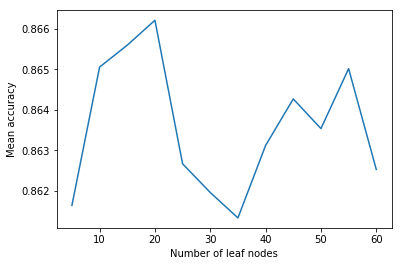

In [142]:
leaf_nodes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

plt.figure()
plt.xlabel("Number of leaf nodes")
plt.ylabel("Mean accuracy")
plt.plot(leaf_nodes, accuracy_list)
plt.show()

### Function that caluclates the optimum number of the depth of the tree
##### First, the function asks you to type in a value for the maximum leaf nodes. You can then type in 4 values for the maximum depth. Then, a new model is created with each of those values and evaluated separately. Afterwards all the values are printed out so you can compare them with each other.

In [98]:
def calculate_max_depth():
    print("This functions compares four values for the maximum depth of the tree for their accuracy to find the most accurate one")
    max_leaf_nodes = int(input("Specify max leaf nodes: "))
    comp_var_a = input("Please enter tree depth: ")
    comp_var_b = input("Please enter tree depth: ")
    comp_var_c = input("Please enter tree depth: ")
    comp_var_d = input("Please enter tree depth: ")

    depth_list = [int(comp_var_a), int(comp_var_b), int(comp_var_c), int(comp_var_d)]
    
    for max_depth in depth_list:
        model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, class_weight="balanced")
        val_scores = cross_val_score(model, X2, y, cv=5)
        mean_accuracy = val_scores.mean()
        standard_dev = val_scores.std() * 2
        print("Depth of tree: {} \t\t Mean accuracy: {} (+/- {})".format(max_depth, mean_accuracy, standard_dev))

### We use this final_tree to combine all our knowledge from before in a new model. From there on, it can be used to predict or to print it out

In [6]:
final_tree = DecisionTreeClassifier(max_leaf_nodes=20)

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X2, y, random_state=0)

In [12]:
final_tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
val_predictions = final_tree.predict(val_X)

In [14]:
class_names = final_tree.classes_
feature_names = X2[0:]

### Use a confusion matrix to calculate actual accurcy of the tree and calculate expected value

In [15]:
y_true = val_y

In [16]:
y_pred = val_predictions

In [17]:
conf_matr = confusion_matrix(y_true, y_pred, labels=["yes", "no"])

In [18]:
df = pd.DataFrame({'Positve':conf_matr[:,0],'Negative':conf_matr[:,1]}, index=["Yes", "No"])

In [19]:
df

,Positve,Negative
Yes,207966,13251
No,17115,18780


In [27]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [28]:
positive_rate = (tp + fp) / val_y.count()
negative_rate = (tn + fn) / val_y.count()
print(positive_rate)

0.8754200504060488


In [29]:
tp_rate = tp/ (tp + fp)
fp_rate = fp/ (tp + fp)
tn_rate = tn/ (tn + fn)
fn_rate = fn/ (tn + fn) 

In [30]:
tp_benefit = 12 # our service is running and makes 12 dollar in 15 minutes
fp_benefit = 9  # our service is running and makes 12 dollar in 15 minutes, but we have to pay our employee 3 for the restock
tn_benefit = 9  # our service is running and makes 12 dollar in 15 minutes because our employee (3 dollar) restocked it
fn_benefit = 0  # our service is not running and makes no money. We also do not pay our employee

In [33]:
expected_value = positive_rate * ((tp_rate * tp_benefit) + (fp_rate * fp_benefit)) + negative_rate * ((tn_rate * tn_benefit) + (fn_rate * fn_benefit))

##### With a positive_rate of 86% we have a baseline average revenue of 10.32 dollar

In [34]:
expected_value

10.962720526463176

##### Our model raises the average revenue to 10.96 dollar

### The following cells export a .dot and a .pdf file to visualize the tree

In [24]:
tree.export_graphviz(final_tree, class_names=class_names, rounded=True, out_file="final_tree2.dot")
(graph,) = pydot.graph_from_dot_file('final_tree2.dot')

In [138]:
graph.write_png('final_tree2.png')